In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tickbars

In [4]:
raw_data = pd.read_csv('ESU13_tickdata.csv')
data_indexed = raw_data.copy()
data_indexed['time'] = pd.to_datetime(data_indexed['time'], format='%m/%d/%Y %H:%M:%S.%f')

In [5]:
imbalance = tickbars.tick_rule(data_indexed['price'])

In [8]:
p_b_up = (imbalance.mean().item()+1)/2
print(p_b_up)
ties = tickbars.TickRunsEvents(imbalance, 100000, max(p_b_up, 1-p_b_up), 2*1e-5)

0.5038884176348081


In [9]:
tick_imb_tevents = ties.get_events()

In [10]:
tick_imb_tevents['time'] = data_indexed.loc[tick_imb_tevents.index, 'time']
tick_imb_tevents['time'] = pd.to_datetime(tick_imb_tevents['time'], format='%m/%d/%Y %H:%M:%S.%f')
tick_imb_tevents

,threshold,time
tevent,,
100569,50388.841763,2013-09-03 04:08:52.757
203971,52249.396913,2013-09-03 09:01:45.921
301490,50163.051072,2013-09-03 10:23:33.020
405096,53608.401724,2013-09-03 11:59:09.737
503580,51179.065306,2013-09-03 13:54:31.126
600251,51458.728144,2013-09-03 20:12:01.211
703704,51912.454318,2013-09-04 08:50:36.963
803189,51250.246431,2013-09-04 10:35:48.629
907717,52384.431106,2013-09-04 13:48:24.236


In [11]:
statistics = pd.DataFrame({'value': ties.statistics, 'time': data_indexed.loc[ties.statistics.index, 'time']})

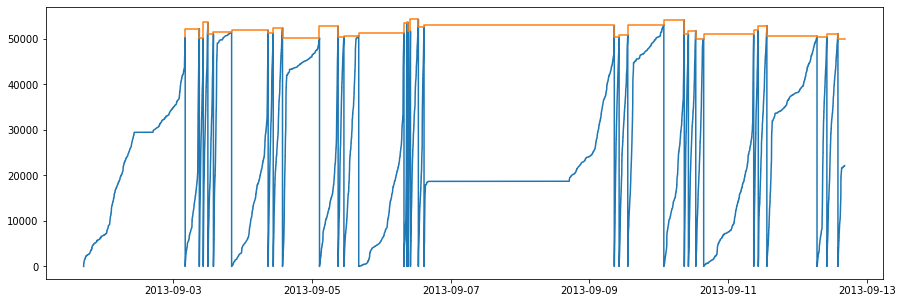

In [12]:
plt.figure(figsize=(15, 5))
plt.plot(statistics['time'], statistics['value'])
plt.step(tick_imb_tevents['time'], tick_imb_tevents['threshold'], where='pre')
plt.show()

In [13]:
data_indexed['grp'] = 0
data_indexed.loc[tick_imb_tevents.index[:-1], 'grp'] = 1
data_indexed['grp'] = np.cumsum(data_indexed['grp'])
data_tick_vwap = tickbars.create_bars(data_indexed, 'grp', tickbars.compute_bar)

In [14]:
data_tick_vwap

,time,open,high,low,close,volume,vwap,duration,ticks
0,2013-09-03 04:08:52.757,1640.25,1649.00,1639.00,1645.25,323495,1645.380100,126532.674,100569
1,2013-09-03 09:01:45.921,1645.25,1650.00,1642.25,1644.75,380284,1646.990137,17573.164,103402
2,2013-09-03 10:23:32.990,1644.75,1648.75,1641.00,1641.00,362335,1645.548233,4907.069,97519
3,2013-09-03 11:59:09.737,1641.00,1641.50,1633.25,1633.75,428429,1637.856998,5736.717,103606
4,2013-09-03 13:54:31.115,1633.75,1635.50,1630.75,1634.00,362803,1633.412700,6921.378,98484
5,2013-09-03 20:12:01.211,1634.00,1640.00,1633.25,1637.75,447837,1637.223539,22650.085,96671
6,2013-09-04 08:50:36.963,1637.75,1642.75,1635.00,1642.50,335374,1638.404800,45515.752,103453
7,2013-09-04 10:35:48.629,1642.50,1650.00,1642.00,1649.50,429204,1646.565568,6311.666,99485
8,2013-09-04 13:48:24.236,1649.50,1654.75,1648.75,1652.00,470964,1652.324165,11555.607,104528
9,2013-09-05 02:36:21.979,1652.00,1655.75,1649.50,1655.25,400791,1652.070352,46077.743,94070


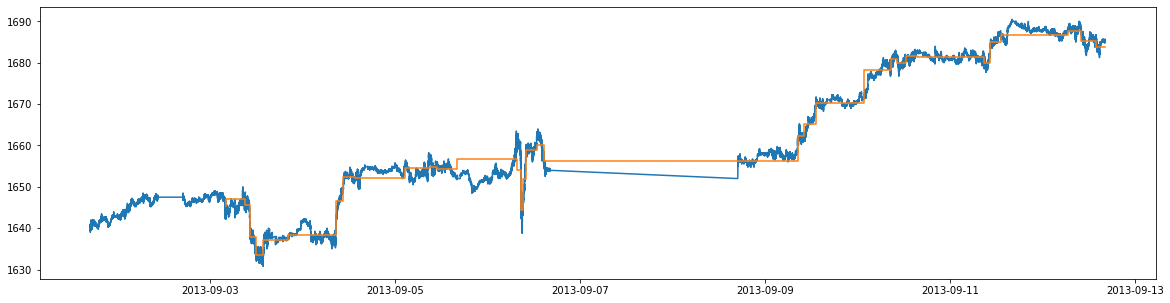

In [33]:
plt.figure(figsize=(20, 5))
plt.plot(data_indexed.time, data_indexed.price)
plt.step(data_tick_vwap['time'], data_tick_vwap['vwap'], where='pre')
plt.show()